# Simple Regression Techniques in Python

In [12]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import datetime as dt

### Get data for SPY and GOOG

In [13]:
stocks = "GOOG SPY".split()
start = dt.date.today() - dt.timedelta(365)

In [15]:
data = pdr.get_data_yahoo(stocks, start)["Close"]
data.head()

Symbols,GOOG,SPY
Date,,
2020-06-29,1394.969971,304.459991
2020-06-30,1413.609985,308.359985
2020-07-01,1438.040039,310.519989
2020-07-02,1464.699951,312.230011
2020-07-06,1495.699951,317.049988


In [18]:
returns = (np.log(data).diff()).dropna()
returns.head()

Symbols,GOOG,SPY
Date,,
2020-06-30,0.013274,0.012728
2020-07-01,0.017134,0.006980
2020-07-02,0.018369,0.005492
2020-07-06,0.020944,0.015319
2020-07-07,-0.007058,-0.010367


In [20]:
sample= returns.sample(60).corr()
sample

Symbols,GOOG,SPY
Symbols,,
GOOG,1.000000,0.774273
SPY,0.774273,1.000000


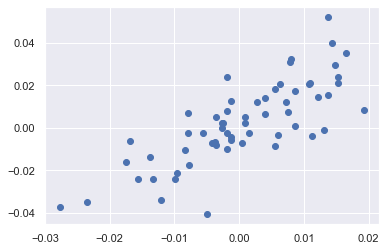

In [22]:
sample = returns.sample(60)
plt.scatter(x=sample['SPY'], y=sample['GOOG']);

In [23]:
reg = np.polyfit(sample['SPY'], sample['GOOG'], deg = 1)
reg

array([1.45990743, 0.00156731])

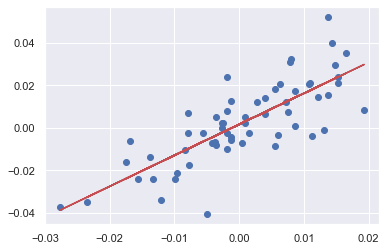

In [25]:
trend = np.polyval(reg, sample['SPY'])
plt.scatter(sample['SPY'], sample['GOOG'])
plt.plot(sample["SPY"], trend, 'r');

### Regression as a Technical Indicator

In [27]:
data = pd.DataFrame(pdr.get_data_yahoo('SPY', start)['Close'])
time = np.arange(1, len(data) + 1)
data['time'] = time
data = data[['time', 'Close']]
data = round(data,2)
data.tail()

,time,Close
Date,,
2021-06-23,249,422.60
2021-06-24,250,425.10
2021-06-25,251,426.61
2021-06-28,252,427.47
2021-06-29,253,428.01


In [28]:
reg = np.polyfit(data['time'], data["Close"], deg = 1)
reg

array([  0.4569597 , 313.19647374])

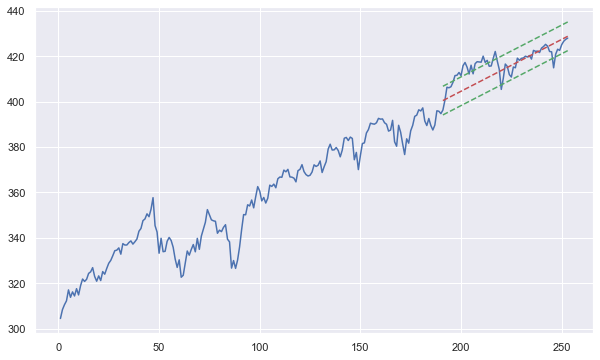

In [41]:
trend = np.polyval(reg, data['time'][-63:])
std = data['Close'][-63:].std()
plt.figure(figsize=(10,6))
plt.plot(data['time'], data['Close'], label ="S&P500")
plt.plot(data['time'][-63:], trend, 'r--')
plt.plot(data['time'][-63:], trend - std, 'g--')
plt.plot(data['time'][-63:], trend + std, 'g--');

In [38]:
predict = np.poly1d(reg)
predict(300)

450.284383950524

### Simple Scatter Plor with Trend Line

<AxesSubplot:xlabel='time', ylabel='Close'>

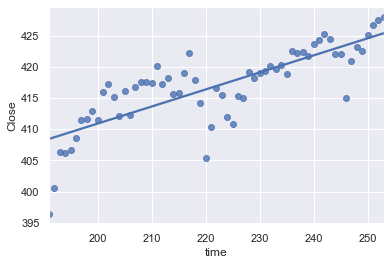

In [40]:
sb.regplot(x='time', y='Close', ci=None, fit_reg=True, data=data[-63:])